In [59]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib
from sklearn.cluster import KMeans
import seaborn as sns 



In [60]:
#IMPORTING THE DATASET
df=pd.read_csv("final_dataset.csv")

In [61]:
df.head(5)
#df.Medium.value_counts()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
0,318192,1101776,KVY1,O,87.0,39.0,82.0,89.0,88.0,Bachelor of Science (Honours) (Agriculture),...,1.0,0.0,181,65,Hostler,North,Female,Hindi,Theory,UG
1,318192,1101776,KVY147,A+,87.0,47.0,65.0,85.0,82.0,Bachelor of Science (Honours) (Agriculture),...,0.0,1.0,181,65,Hostler,North,Female,Hindi,Theory,UG
2,318192,1101776,KVY148,B+,84.0,29.0,63.0,77.0,76.0,Bachelor of Science (Honours) (Agriculture),...,3.0,5.0,181,65,Hostler,North,Female,Hindi,Theory,UG
3,318192,1101776,KVY2,A+,NaN,NaN,NaN,82.0,74.0,Bachelor of Science (Honours) (Agriculture),...,NaN,NaN,181,65,Hostler,North,Female,Hindi,Practical,UG
4,318192,1101776,KVY3,A+,87.0,34.0,68.0,89.0,76.0,Bachelor of Science (Honours) (Agriculture),...,2.0,17.0,181,65,Hostler,North,Female,Hindi,Theory,UG


In [62]:
df["MHRDName"].value_counts().head()

Bachelor of Science (Honours) (Agriculture)                                                     7707
Bachelor of Technology in Computer Science and Engineering (Big Data)                           5493
Bachelor of Technology (Computer Science and Engineering)                                       4900
Bachelor of Technology in Computer Science and Engineering (Android Application Development)    4324
Bachelor of Technology in Electronics and Communication Engineering (Internet of Things)        3917
Name: MHRDName, dtype: int64

## SELECTING DATA FROM DATASET

In [63]:
###Only rows are selected where MHRDName == Integrated Bachelor of Technology - Master of Technology (Civil Engineering)


df = df[df['MHRDName'] == 'Integrated Bachelor of Technology - Master of Technology (Civil Engineering)']
print("Rows of MHRDName = Integrated Bachelor of Technology - Master of Technology (Civil Engineering):",df.shape[0])
df = df.drop('MHRDName',axis=1)

Rows of MHRDName = Integrated Bachelor of Technology - Master of Technology (Civil Engineering): 56


In [64]:
df.shape

(56, 21)




## __Handling the missing values__

In [65]:
df["CA_100"].fillna(value=0,axis=0,inplace=True)


In [66]:
df["MTT_50"].fillna(value=0,axis=0,inplace=True)



In [67]:
df["ETT_100"].fillna(value=0,axis=0,inplace=True)



In [68]:
df["ETP_100"].fillna(value=0,axis=0,inplace=True)



In [69]:
df["Course_Att"].fillna(value=0,axis=0,inplace=True)



In [70]:
df.isnull().sum()

Termid         0
Regd No        0
Course         0
Grade          0
CA_100         0
MTT_50         0
ETT_100        0
ETP_100        0
Course_Att     0
CA_1           0
CA_2           0
CA_3           0
CA_4           0
Height         0
Weight         0
ScholarType    0
Direction      0
Gender         0
Medium         0
CourseType     0
ProgramType    0
dtype: int64

In [71]:
df["CA_1"].fillna(value=0,axis=0,inplace=True)

In [72]:

df["CA_2"].fillna(value=0,axis=0,inplace=True)

In [73]:
df["CA_3"].fillna(value=0,axis=0,inplace=True)

In [74]:
df["CA_4"].fillna(value=0,axis=0,inplace=True)

In [75]:
df.isnull().sum()

Termid         0
Regd No        0
Course         0
Grade          0
CA_100         0
MTT_50         0
ETT_100        0
ETP_100        0
Course_Att     0
CA_1           0
CA_2           0
CA_3           0
CA_4           0
Height         0
Weight         0
ScholarType    0
Direction      0
Gender         0
Medium         0
CourseType     0
ProgramType    0
dtype: int64

In [76]:
#Course        
#Grade

In [77]:
df['Grade'].value_counts().head(6)

A     19
B+    13
A+    12
O      3
B      3
C      2
Name: Grade, dtype: int64

In [78]:
df['Course'].value_counts().head(5)

KYI12      10
KYI1700     4
KYI2146     3
KYI1703     3
KYI1704     3
Name: Course, dtype: int64

In [79]:
df["Grade"].head(8)

17       A
821     B+
3375     A
4544    A+
4545    B+
4546     A
4547     A
4548    B+
Name: Grade, dtype: object

In [80]:
df["Course"].head(8)

17        KYI12
821       KYI12
3375      KYI12
4544    KYI1129
4545    KYI1130
4546    KYI1700
4547    KYI1822
4548    KYI1823
Name: Course, dtype: object

## Label Encoder to convert values into numerical values

In [81]:
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [82]:
#creating an object of LabelEncoder
ss=LabelEncoder()

In [83]:
#using the fit_transform method to convert 
df["Grade"]=ss.fit_transform(df["Grade"])
#creating a variable as Gradelen which will contain the length of grade for different values of grade
#this variable will be used in looping in Kmeans clustering
Gradelen=len(df['Grade'].unique())

In [84]:
df.Grade.head(5)
#checking the numeric values after conversion

17      0
821     3
3375    0
4544    1
4545    3
Name: Grade, dtype: int32

In [85]:
#converting course
df["Course"]=ss.fit_transform(df["Course"])

In [86]:
df[["Course"]].head(8)

,Course
17,3
821,3
3375,3
4544,1
4545,2
4546,4
4547,9
4548,10


In [87]:
df.head(4)

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
17,518192,1105776,3,0,89.0,0.0,0.0,64.0,0.0,62.0,...,4.0,18.0,155,75,Hostler,North,Female,Regional,Theory,UG
821,518192,1326776,3,3,71.0,0.0,0.0,72.0,0.0,54.0,...,3.0,0.0,170,65,Hostler,South,Female,Regional,Theory,UG
3375,518192,1945776,3,0,87.0,0.0,0.0,63.0,0.0,24.0,...,20.0,20.0,166,97,Hostler,South,Male,English,Theory,UG
4544,418192,2199776,1,1,88.0,43.0,72.0,0.0,84.0,58.0,...,1.0,13.0,162,45,Day Scholar,South,Female,English,Theory,UG


In [88]:
df.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height',
       'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium', 'CourseType',
       'ProgramType'],
      dtype='object')

In [89]:
#similarly for all the values that are non numeric 
df["ScholarType"]=ss.fit_transform(df["ScholarType"])

In [90]:
df["Direction"]=ss.fit_transform(df["Direction"])

In [91]:
df["Gender"]=ss.fit_transform(df["Gender"])

In [92]:
df["Medium"]=ss.fit_transform(df["Medium"])

In [93]:
df["CourseType"]=ss.fit_transform(df["CourseType"])

In [94]:
df["ProgramType"]=ss.fit_transform(df["ProgramType"])

In [95]:
df.head(4)

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
17,518192,1105776,3,0,89.0,0.0,0.0,64.0,0.0,62.0,...,4.0,18.0,155,75,1,1,0,2,0,0
821,518192,1326776,3,3,71.0,0.0,0.0,72.0,0.0,54.0,...,3.0,0.0,170,65,1,2,0,2,0,0
3375,518192,1945776,3,0,87.0,0.0,0.0,63.0,0.0,24.0,...,20.0,20.0,166,97,1,2,1,0,0,0
4544,418192,2199776,1,1,88.0,43.0,72.0,0.0,84.0,58.0,...,1.0,13.0,162,45,0,2,0,0,0,0


In [96]:
#checking the value count
df.Direction.value_counts()

1    22
3    12
2    11
0    11
Name: Direction, dtype: int64

In [97]:
df.CourseType.value_counts()

0    56
Name: CourseType, dtype: int64

In [98]:
df.ProgramType.value_counts()

0    56
Name: ProgramType, dtype: int64

In [99]:

X=df.loc[:,['CA_100','MTT_50']]
print(X)

       CA_100  MTT_50
17       89.0     0.0
821      71.0     0.0
3375     87.0     0.0
4544     88.0    43.0
4545     71.0    30.0
4546     82.0     0.0
4547     70.0    42.0
4548     62.0    37.0
4549     61.0    42.0
4550     72.0     0.0
4551     67.0    37.0
8803     96.0     0.0
11348    82.0     0.0
12325    70.0     0.0
12733    70.0    30.0
12734    40.0    20.0
12735    17.0     5.0
12736    44.0     0.0
12737    80.0     0.0
12738    59.0     0.0
12739    65.0     0.0
12740    40.0    24.0
12741    70.0    18.0
12742    36.0     0.0
12743    58.0     0.0
13117    83.0     0.0
13118    79.0    40.0
13119    72.0    33.0
13120    83.0     0.0
13121    62.0    33.0
13122    70.0    39.0
13123    70.0    29.0
13124    82.0    35.0
13125    81.0     0.0
13275    60.0     0.0
15865    77.0     0.0
34115    81.0     0.0
34116    79.0    30.0
34117    65.0    37.0
34118    83.0     0.0
34119    62.0    39.0
34120    67.0    33.0
34121    74.0    35.0
34122    75.0    38.0
34123    7

In [100]:
df.head(5)

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
17,518192,1105776,3,0,89.0,0.0,0.0,64.0,0.0,62.0,...,4.0,18.0,155,75,1,1,0,2,0,0
821,518192,1326776,3,3,71.0,0.0,0.0,72.0,0.0,54.0,...,3.0,0.0,170,65,1,2,0,2,0,0
3375,518192,1945776,3,0,87.0,0.0,0.0,63.0,0.0,24.0,...,20.0,20.0,166,97,1,2,1,0,0,0
4544,418192,2199776,1,1,88.0,43.0,72.0,0.0,84.0,58.0,...,1.0,13.0,162,45,0,2,0,0,0,0
4545,418192,2199776,2,3,71.0,30.0,59.0,0.0,88.0,55.0,...,6.0,2.0,162,45,0,2,0,0,0,0


In [101]:
df.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height',
       'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium', 'CourseType',
       'ProgramType'],
      dtype='object')

## Data visualization

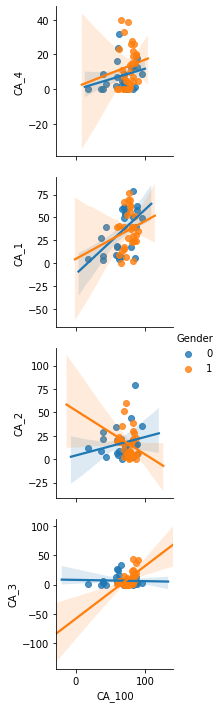

In [102]:
#data visualization of CA's
sns.pairplot( data=df,
   hue='Gender',
    palette=None,
    x_vars=["CA_100"],
    y_vars=["CA_4",'CA_1', 'CA_2', 'CA_3'],
    #size=6,
    kind="reg",)
plt.show()


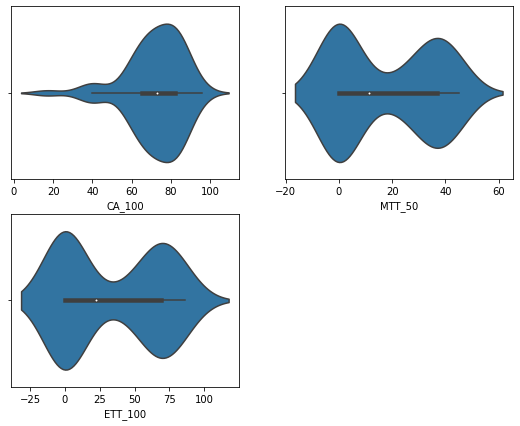

In [103]:
#visualization of final CA, MTT and ETT
plt.figure(figsize=(9,7))
plt.subplot(2,2,1)
sns.violinplot(df['CA_100'])
plt.subplot(2,2,2)
sns.violinplot(df['MTT_50'])
plt.subplot(2,2,3)
sns.violinplot(df['ETT_100'])





# #outliers


In [104]:
df.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height',
       'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium', 'CourseType',
       'ProgramType'],
      dtype='object')

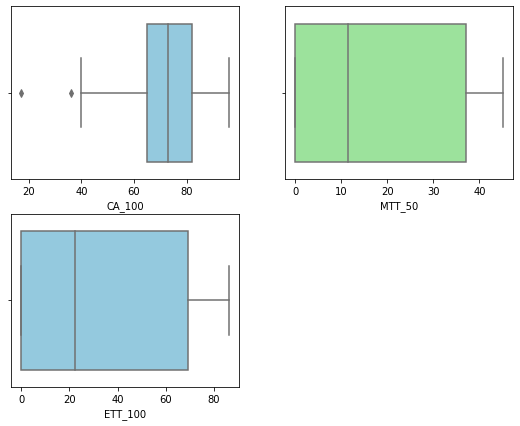

In [105]:
plt.figure(figsize=(9,7))
plt.subplot(2,2,1)
sns.boxplot(df.CA_100,color="skyblue")
plt.subplot(2,2,2)
sns.boxplot(df['MTT_50'],color="lightgreen")
plt.subplot(2,2,3)
sns.boxplot(df['ETT_100'],color="skyblue")

In [106]:
##  NO outliers is present 

## Heatmap(for seeing the correlation )

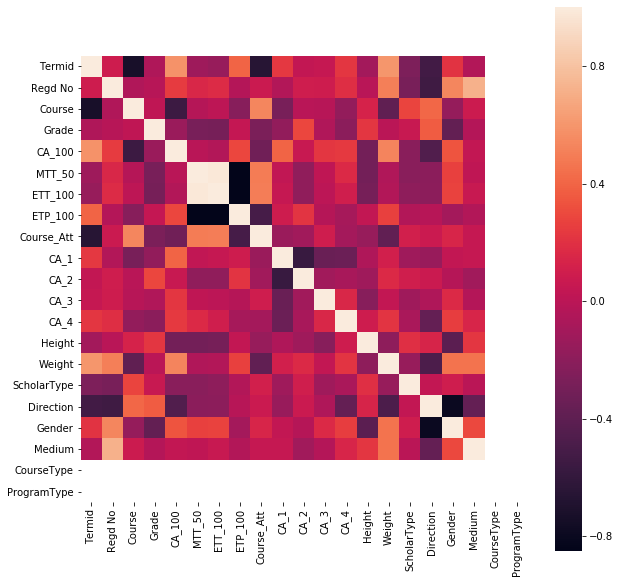

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square= True)

In [108]:
df.reset_index(inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 22 columns):
index          56 non-null int64
Termid         56 non-null int64
Regd No        56 non-null int64
Course         56 non-null int32
Grade          56 non-null int32
CA_100         56 non-null float64
MTT_50         56 non-null float64
ETT_100        56 non-null float64
ETP_100        56 non-null float64
Course_Att     56 non-null float64
CA_1           56 non-null float64
CA_2           56 non-null float64
CA_3           56 non-null float64
CA_4           56 non-null float64
Height         56 non-null int64
Weight         56 non-null int64
ScholarType    56 non-null int32
Direction      56 non-null int32
Gender         56 non-null int32
Medium         56 non-null int32
CourseType     56 non-null int32
ProgramType    56 non-null int32
dtypes: float64(9), int32(8), int64(5)
memory usage: 8.0 KB


In [110]:
df.shape

(56, 22)

In [111]:
df.columns

Index(['index', 'Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50',
       'ETT_100', 'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'],
      dtype='object')

In [112]:
#splitting
kmeans_df = df.copy()
kmeans_df = df.drop(['Regd No','Grade'],axis=1)

## Elbow Method 



636189064403426.5
71285885803293.75
37931288152989.64
10776431899720.572
3487059228653.3535
1980830907869.349
1092612021225.2806
662569751172.3367
373335450968.4034


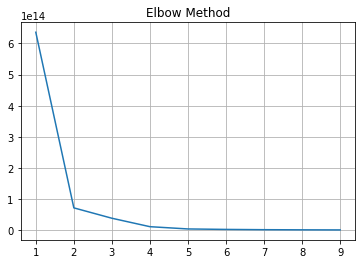

In [113]:
#Elbow method

distortion=[]

for i in range(1,10,1):
    km=KMeans(n_clusters=i)
    y_km=km.fit_predict(df)
    distortion.append(km.inertia_)
    print(km.inertia_)

a=np.arange(1,10,1)
plt.plot(a,distortion)
plt.grid()
plt.title('Elbow Method')
plt.show()

In [114]:
#elbow method gives a clear idea of number of cluster to made 
#as we can see it's 4 because after four graph is linear so we can take the value as 4


In [115]:
print("Columns in KMeans data input\n",kmeans_df.columns.values)
#creating an array of colors for the clusters
c = ['red','blue','green','yellow','orange','black','indigo']

distortion=[]

Columns in KMeans data input
 ['index' 'Termid' 'Course' 'CA_100' 'MTT_50' 'ETT_100' 'ETP_100'
 'Course_Att' 'CA_1' 'CA_2' 'CA_3' 'CA_4' 'Height' 'Weight' 'ScholarType'
 'Direction' 'Gender' 'Medium' 'CourseType' 'ProgramType']


In [116]:
#so what we can do we can simply loop over the gradelen that is why we have intialized the Gradelen earlier  as that number of clusters should be made.

## Applying the Kmeans

*******************************************************
Centers [[2.26132222e+04 4.40414222e+05 8.17777778e+00 7.63111111e+01
  2.00000000e+01 3.78444444e+01 3.30444444e+01 5.92666667e+01
  3.85111111e+01 1.60666667e+01 9.51111111e+00 1.22222222e+01
  1.60711111e+02 6.24222222e+01 5.33333333e-01 1.04444444e+00
  6.66666667e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]]
*******************************************************
Silhouette score for 2 cluster = 0.6969112216047011
********************************************************


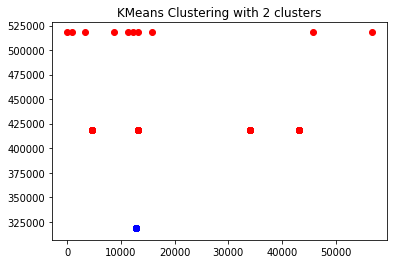

*******************************************************
Centers [[ 2.42648286e+04  4.18192000e+05  9.65714286e+00  7.51142857e+01
   2.57142857e+01  4.86571429e+01  2.27428571e+01  7.62000000e+01
   3.82285714e+01  1.45714286e+01  1.00285714e+01  1.22857143e+01
   1.58914286e+02  5.96571429e+01  5.14285714e-01  9.71428571e-01
   7.71428571e-01  1.02857143e+00  0.00000000e+00  0.00000000e+00]
 [ 1.27380000e+04  3.18192000e+05  2.04545455e+01  5.26363636e+01
   8.81818182e+00  1.96363636e+01  2.13636364e+01  8.37272727e+01
   2.30909091e+01  1.90909091e+01  6.00000000e+00  4.45454545e+00
   1.69000000e+02  4.40000000e+01  1.00000000e+00  3.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.68326000e+04  5.18192000e+05  3.00000000e+00  8.05000000e+01
   3.55271368e-15 -7.10542736e-15  6.91000000e+01  0.00000000e+00
   3.95000000e+01  2.13000000e+01  7.70000000e+00  1.20000000e+01
   1.67000000e+02  7.21000000e+01  6.00000000e-01  1.30000000e+00
   3.00000

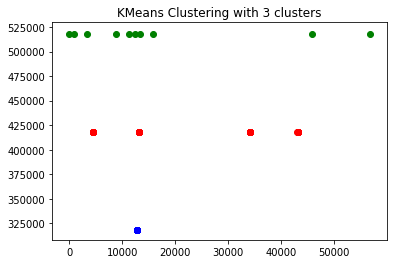

*******************************************************
Centers [[ 1.27380000e+04  3.18192000e+05  2.04545455e+01  5.26363636e+01
   8.81818182e+00  1.96363636e+01  2.13636364e+01  8.37272727e+01
   2.30909091e+01  1.90909091e+01  6.00000000e+00  4.45454545e+00
   1.69000000e+02  4.40000000e+01  1.00000000e+00  3.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.08641176e+03  4.18192000e+05  9.05882353e+00  7.38235294e+01
   2.58823529e+01  4.73529412e+01  2.31764706e+01  7.57058824e+01
   3.87058824e+01  1.57058824e+01  1.01764706e+01  9.23529412e+00
   1.56176471e+02  4.92352941e+01  5.29411765e-01  1.47058824e+00
   5.29411765e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.68326000e+04  5.18192000e+05  3.00000000e+00  8.05000000e+01
   3.55271368e-15 -7.10542736e-15  6.91000000e+01  0.00000000e+00
   3.95000000e+01  2.13000000e+01  7.70000000e+00  1.20000000e+01
   1.67000000e+02  7.21000000e+01  6.00000000e-01  1.30000000e+00
   3.00000

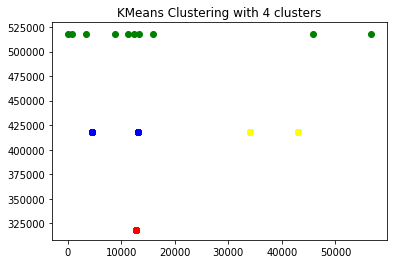

*******************************************************
Centers [[3.86000000e+04 4.18192000e+05 1.02222222e+01 7.63333333e+01
  2.55555556e+01 4.98888889e+01 2.23333333e+01 7.66666667e+01
  3.77777778e+01 1.35000000e+01 9.88888889e+00 1.51666667e+01
  1.61500000e+02 6.95000000e+01 5.00000000e-01 5.00000000e-01
  1.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.22862500e+03 5.18192000e+05 3.00000000e+00 7.90000000e+01
  0.00000000e+00 0.00000000e+00 6.73750000e+01 0.00000000e+00
  4.37500000e+01 1.48750000e+01 7.87500000e+00 1.25000000e+01
  1.65625000e+02 7.28750000e+01 7.50000000e-01 1.37500000e+00
  3.75000000e-01 8.75000000e-01 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9

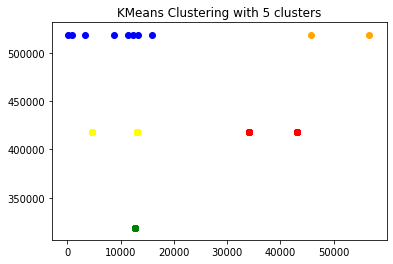

*******************************************************
Centers [[9.08641176e+03 4.18192000e+05 9.05882353e+00 7.38235294e+01
  2.58823529e+01 4.73529412e+01 2.31764706e+01 7.57058824e+01
  3.87058824e+01 1.57058824e+01 1.01764706e+01 9.23529412e+00
  1.56176471e+02 4.92352941e+01 5.29411765e-01 1.47058824e+00
  5.29411765e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.22862500e+03 5.18192000e+05 3.00000000e+00 7.90000000e+01
  0.00000000e+00 0.00000000e+00 6.73750000e+01 0.00000000e+00
  4.37500000e+01 1.48750000e+01 7.87500000e+00 1.25000000e+01
  1.65625000e+02 7.28750000e+01 7.50000000e-01 1.37500000e+00
  3.75000000e-01 8.75000000e-01 0.00000000e+00 0.00000000e+00]
 [4

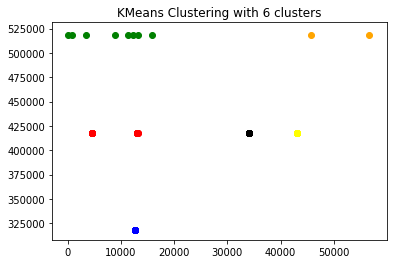

*******************************************************
Centers [[8.22862500e+03 5.18192000e+05 3.00000000e+00 7.90000000e+01
  0.00000000e+00 0.00000000e+00 6.73750000e+01 0.00000000e+00
  4.37500000e+01 1.48750000e+01 7.87500000e+00 1.25000000e+01
  1.65625000e+02 7.28750000e+01 7.50000000e-01 1.37500000e+00
  3.75000000e-01 8.75000000e-01 0.00000000e+00 0.00000000e+00]
 [1.31210000e+04 4.18192000e+05 1.02222222e+01 7.57777778e+01
  2.32222222e+01 4.40000000e+01 2.67777778e+01 7.74444444e+01
  3.21111111e+01 2.31111111e+01 1.25555556e+01 8.00000000e+00
  1.51000000e+02 5.30000000e+01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3

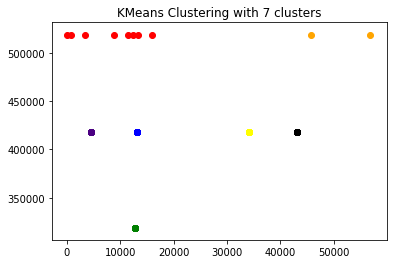

*******************************************************
Centers [[1.31210000e+04 4.18192000e+05 1.02222222e+01 7.57777778e+01
  2.32222222e+01 4.40000000e+01 2.67777778e+01 7.74444444e+01
  3.21111111e+01 2.31111111e+01 1.25555556e+01 8.00000000e+00
  1.51000000e+02 5.30000000e+01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.23232000e+04 5.18192000e+05 3.00000000e+00 7.70000000e+01
  0.00000000e+00 0.00000000e+00 6.80000000e+01 0.00000000e+00
  4.20000000e+01 1.54000000e+01 7.20000000e+00 1.24000000e+01
  1.66800000e+02 6.92000000e+01 6.00000000e-01 1.20000000e+00
  4.00000000e-01 6.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3

IndexError: list index out of range

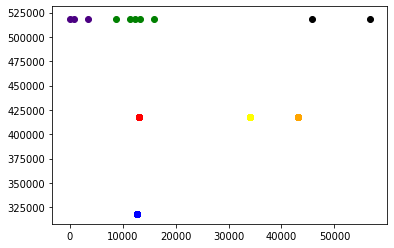

In [117]:

from sklearn.metrics import silhouette_score
for i in range(2,Gradelen):
    kmeans = KMeans(n_clusters=i)
    y_km = kmeans.fit_predict(kmeans_df)
    print('*******************************************************')
    print("Centers",kmeans.cluster_centers_)
    print('*******************************************************')
    distortion.append(kmeans.inertia_)
    
    print('Silhouette score for {} cluster ='.format(i),silhouette_score(kmeans_df,y_km))
    print('********************************************************')
    kmeans_df_array = np.array(kmeans_df)
    for j in range(len(kmeans.cluster_centers_)):
        plt.scatter(kmeans_df_array[y_km==j,0],kmeans_df_array[y_km==j,1],marker='o',c=c[j])
    plt.title('KMeans Clustering with {} clusters'.format(i))
    plt.show()
print('Distortion-->',distortion)

a=np.arange(2,Gradelen)
plt.plot(a,distortion)
plt.grid()
plt.show()

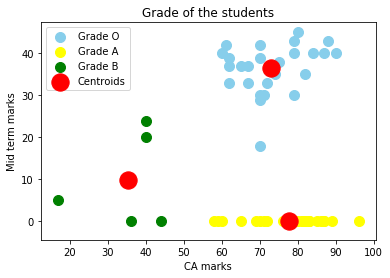

In [127]:
from sklearn.impute import SimpleImputer
#using the value that we get in elbow method 

#this part was left 
#so uploading in github directly(sorry for this ma'am)
x=df.loc[:,['CA_100','MTT_50']]
x=SimpleImputer(missing_values=np.nan, strategy='mean',verbose=0).fit_transform(x)
#let do for 3 clusters that contain grade O, A and B.
kmm=KMeans(n_clusters=3, init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmm=kmm.fit_predict(X)
 
plt.scatter(x[y_kmm==0,0], x[y_kmm==0,1],s=100,c='skyblue', label='Grade O')
plt.scatter(x[y_kmm==1,0],x[y_kmm==1,1],s=100,c='yellow', label='Grade A')
plt.scatter(x[y_kmm==2,0],x[y_kmm==2,1],s=100,c='green', label='Grade B')

plt.scatter(kmm.cluster_centers_[:,0], kmm.cluster_centers_[:,1], s=300,c='red', label='Centroids')
plt.title('Grade of the students')
plt.xlabel('CA marks')
plt.ylabel('Mid term marks')
plt.legend()
plt.show()


## Applying Agglomerative Clustering

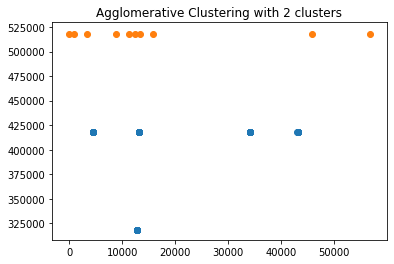

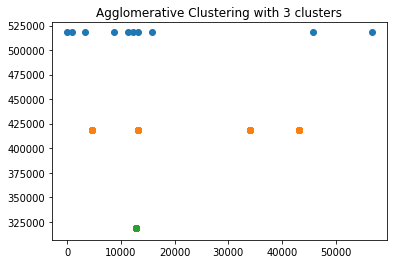

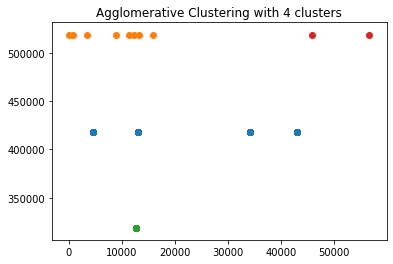

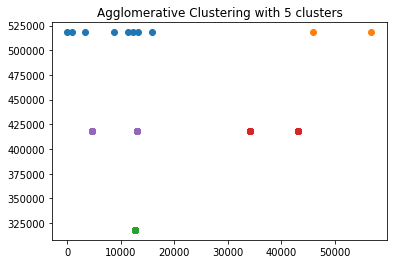

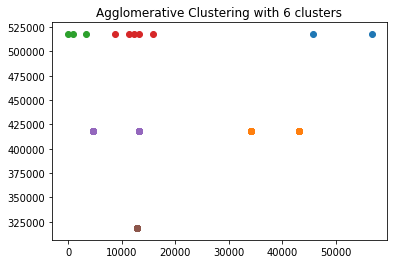

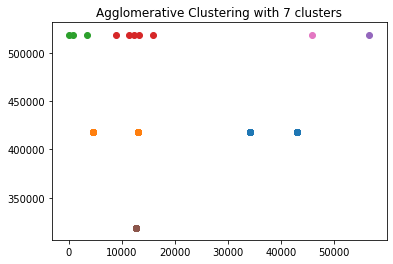

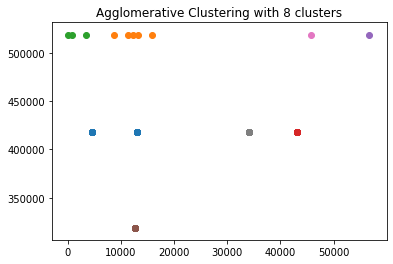

In [490]:
#Agglomerative Clustering technique
#importing the agglomerative clustering
from sklearn.cluster import  AgglomerativeClustering
ac_df = df.copy()
ac_df = df.drop(['Regd No','Grade'],axis=1)
#looping over the gradesLen
for i in range(2,Gradelen):
    ac = AgglomerativeClustering(n_clusters=i,affinity='euclidean', linkage='complete')
    labels = ac.fit_predict(ac_df) 
    for j in range(i):
        plt.scatter(ac_df.iloc[labels == j,0], ac_df.iloc[labels == j,1])
        plt.title('Agglomerative Clustering with {} clusters'.format(i))
        plt.plot()
    plt.show()

## DBSCAN CLUSTERING 
### Density-Based Spatial Clustering of Applications with Noise


In [416]:
from sklearn.cluster import  DBSCAN
db_df = df.copy()
db_df = df.drop(['Regd No','Grade'],axis=1)
for i in range(2,4):
    db = DBSCAN(eps = 0.25)
    labels = db.fit_predict(db_df) 
    for j in range(i):
        plt.scatter(db_df.iloc[labels == j,0], db_df.iloc[labels == j,1])
        plt.title('DBSCAN Clustering with {} clusters'.format(i))
        plt.plot()
    plt.show()

In [242]:
#from sklearn.cluster import KMeans
#km = KMeans(n_clusters=5)
#cluster = km.fit(reduced_data)
#plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
#plt.scatter(X.cluster_centers_[:, 0], X.cluster_centers_[:, 1], label='Clusters')
#plt.title("Sklearn version of KMeans")
#plt.legend()
#plt.show()

636189064403426.5
71285885803293.75
37931288152989.64
10776431899720.572
3487059228653.3535
1980830907869.349
1092612021225.2806
662569751172.3367
373335450968.4034


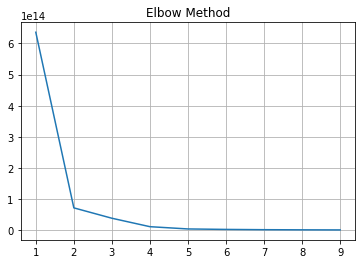

In [382]:
#from sklearn.cluster import KMeans
#import numpy as np

#distortion=[]

#for i in range(1,10,1):
 #   km=KMeans(n_clusters=i)
  #  y_km=km.fit_predict(df)
 #   distortion.append(km.inertia_)
 #   print(km.inertia_)

#a=np.arange(1,10,1)
#plt.plot(a,distortion)
#plt.grid()
#plt.title('Elbow Method')
#plt.show()

In [224]:
#from sklearn.cluster import KMeans
#k=KMeans(n_clusters=4,tol=0.0001)




In [226]:
#k.fit(X)
#clusters = k.labels_.tolist()
#print(clusters)